# Практическая работа №6: Кластерный анализ. Метод k-средних

Выполнили студенты гр. 0382 Корсунов Антон и Здобнова Ксения. Вариант №11

## Цель работы

Освоение основных понятий и некоторых методов кластерного анализа, в частности, метода k-means.

## Основные теоретические положения

**Задача кластерного анализа** заключается в том, чтобы на основании данных, характеризующих исследуемые объекты, разбить множество объектов $G$ на $m$ ($m$ - целое) кластеров (подмножеств $G$) $G_1, G_2, ..., G_m,$ таких, что:
$$G_1 \subset G; G_2 \subset G;...; G_m \subset G;$$
$$G_1 \cup G_2 \cup ... \cup G_m = G$$
$$G_i \cap G_j = \emptyset,  \forall i \ne j, i = 1,2,...,m, j = 1, 2, ..., m$$
Объекты, принадлежащие одному и тому же кластеру, должны быть однородными в смысле заданного критерия, в то время как объекты, принадлежащие разным кластерам, должны быть разнородными
****
**Результатом решения задачи кластенрного анализа** являются разбиения, удовлетворяющие заданной мере внутрикластерного сходства - некоторому критерию оптимальности. Этот критерий может представлять собой функционал - целевую функцию.
Например, в качестве целевой функции может быть взята внутригрупповая сумма квадратов отклонения:
$$W_k = \sigma_k^2 = \frac{1}{n_k}\sum_{j=1}^{n_k}(x_{kj}-\bar x_{k})^2 = \frac{1}{n_k}(\sum_{j=1}^{n_k}x_j^2)-(\bar x_k)^2$$
где $k$ - номер (индекс) кластера
****
**Центр кластера** - среднее геометрическое место точек, принадлежащих кластеру, в пространстве данных
****
**Радиус кластера** - максимальное расстояние точек, принадлежащих кластеру, от центра кластера
****
**Кластеры могут быть перекрывающимися.** В этом случае невозможно при помощи используемых процедур однозначано отнести объект к одному из двух или более кластеров. Такие объекты называются **спорными**.
****
**Спорный объект** - это объект, который по мере сходства может быть отнесен к более, чем одному кластеру.
****
**Размер кластера** может быть определен либо по радиусу кластера, либо по среднеквадратичному отклонению объектов для этого кластера. Объект относится к кластеру, если расстояние от объекта до центра кластера меньше или равно радиусу кластера. Если это условие выполняется для двух и более кластеров, объект является спорным.
****
Различные способы нормировки данных:
$$z = \frac{(x - \bar x)}{\sigma}; z = \frac{x}{\bar x}; z = \frac{x}{x_{max}}; z = \frac{(x - \bar x)}{x_{max} - x_{min}}$$
****
**Расстоянием (метрикой)** между объектами $a$ и $b$ в пространстве параметров называется такая величина $d_{ab}$, которая удовлетворяет аксиомам:




1.   $d_{ab} > 0$, если $a \ne b$
2.   $d_{ab} = d_{ba}$
3.   $d_{ab} = 0$,если $a = b $
4.   $d_{ab} + d_{bc} ≥ d_{ac}$
****
**Мерой близости (сходства)** называется величина $μ_{ab},$ имеющая предел и возрастающя с возрастанием близости объектов и удовлетворяющая условиям:

$μ_{ab}$ непрерывна; $μ_{ab} = μ_{ba}$; $0 \le μ_{ab} \le 1$

Существует возможность простого перехода от расстояния к мерам близости:
$$\mu = \frac{1}{1+d}$$
****
К наиболее часто используемым способом определения расстояния между объектами относятся следующие:

$d_{E_{ij}} = \sqrt{\sum_{k=1}^m(x_k^{(i)}-x_k^{(j)})^2}$ - Евклидово расстояние

$d_{E_{ij}}^2 = \sum_{k=1}^m(x_k^{(i)}-x_k^{(j)})^2$ - Квадрат евклидового расстояния

$d_{P_{ij}} = (\sum_{k=1}^m(x_k^{(i)}-x_k^{(j)})^P)^{\frac{1}{P}}$ - Обобщенное степенное расстояние Минковского

$d_{ij} = max_{1 \le k \le m}|x_k^{(i)}-x_k^{(j)}|$ - Расстояние Чебышева

$d_H(x^{(i)}, x^{(j)}) = \sum_{k=1}^m|x_k^{(i)}-x_k^{(j)}|$ - Расстояние городских кварталов
****
**Расстояние между кластерами:**


1.   Расстояние **"Ближайшего соседа":**
$$d_{min}(K_i, K_j) = min_{x_i \in K_i, x_j \in K_j}d(x_i, x_j)$$
2.   Расстояние **Дальнего соседа:**
$$d_{max}(K_i, K_j) = max_{x_i \in K_i, x_j \in K_j}d(x_i, x_j)$$
3.   **Невзвешенный центроидный метод.** Расстояние между кластерами определяется как расстояние между их центрами тяжести
4.   **Взвешенный центроидный метод.** Метод идентичен предыдущему, за исключением того, что при вычислениях учитывается число объектов в них.
5.   **Метод Уорда.** В этом методе в качестве целевой функции применяют внутригрупповую сумму квадратов отклонений каждого элемента кластера от средней точки этого кластера. Мерой расстояния между двумя кластерами считается увеличение целевой функции, т.е. внутригрупповой суммы квадрвтов, при объединении этих кластеров
****
Для оценки полученных результатов кластеризации используются так называемые **функционалы качества.** Наилучшим считается такое разбиение, при котором достигается минимальное или максимальное значение выбранного функционала качества.

В качестве таких функционалов могут быть использованы:


1.   Сумма квадратов расстояний до центров кластеров
$$F_1 = \sum_{k=1}^K\sum_{i=1}^{N_k}d^2(X_i^{(k)}, \bar X ^{(k)}) → min$$
2.   Сумма внутрикластерных расстояний между объектами
$$F_2 = \sum_{k=1}^K\sum_{X_i, X_j \in S_k}d^2(X_i, X_j) → min$$
3.   Сумма внутрикластерных дисперсий
$$F_3 = \sum_{k=1}^K\sum_{i=1}^{N_k}\sigma_{kj}^2 → min$$

где $\sigma_{kj}^2$ - дисперсия $j$-й переменной в $k$-м кластере.

Оптимальным следует считать разбиене, при котором сумма внутрикластерных (внутригрупповых) дисперсий будет минимальной.
****
Методы кластерного анализа можно разделить на две группы:

**иерархические**

**неиерархические**

Суть иерархической кластеризации состоит в последовательном объединении меньших кластеров в большие или разделении больших кластеров на меньшие
****
**Иерархические агломеративные методы**

В начале работы метода все объекты яляются отдельными кластерами. На первом шаге наиболее похожие объекты объединяются в кластер. На последующих шагах объединение продолжается до тех пор, пока все объекты не будут составлять один кластер.
****
**Иерархические дивизимные (делимые) методы**

Эти методы являются логической противоположность. агломеративным методам. В начале работы алгоритма все объекты принадлежат одному кластеру который на последующих шагах делится на меньшие кластеры, в результате образуется последовательность расщепляющих групп
****
**Метод $k$-средних**
Пусть имеется $n$ наблюдений, каждое из которых характеризуется $m$ признаками $X_1, X_2, ..., X_n$. Эти наблюдения необходимо разбить на $k$ кластеров.

Из $n$ точек исследуемой совокупности отбираются случайным образом или задаются, исходя из каких-либо априорных соображения, $k$ точек (объектов). Эти точки принимаются за эталоны - центры кластеров. Каждому эталону присваивается порядковый номер, который одновременно является и номером кластера.

На первом шаге из оставшихся ($n-k$) объектов извлекается точка $X_i$ с координатами ($x_{i1}, x_{i2},...,x_{im}$) и проверяется, к какому из эталонов (центров) она находится ближе всего.

Для этого используется одна из метрик, например, евклидово расстояние. Проверяемый объект присоединяется к тому центру (эталону), которому соответствует минимальное из расстояний. Эталон заменяется новым (корректируется), пересчитанным с учетом присоединенной точки (вычисляется новое значение среднего арифметического всех включенных в кластер элементов), вес кластера (количество объектов, входящих в данный кластер) увеличивается на единицу. Если встречаются два и более минимальных расстояния, то $i$-й объект присоединяют к центру (кластеру) с наименьшим порядковым номером.

На следующем шаге выбирают точку $X_{i+1}$ и для нее повторяются все процедуры.

Таким образом, через $(n-k)$ шагов все точки (объекты) совокупности окажутся отнесенными к одному из $k$ кластеров. Цикл процедуры завершается, но на этом метод работу не заканчивает.

Для того чтобы добиться устойчивости все кластеры считаются пустыми с центрами (эталонами), полученными в конце предыдущего цикла. Все точки $X_1, X_2, ..., X_n$ снова последовательно подсоединяются к этим кластерам по рассмотренным правилам. Цикл повторяется. По его завершению новое разбиение сравнивается с полученными в предыдущем цикле. Если они совпадают, работа алгоритма завершается. В противном случае цикл снова повторяется.

Окончальное разбиение имеет центры тяжести, которые, как правило, не совпадают с первоначальными эталонами. Каждая точка $X_i, i = 1, 2, ..., n,$ будет относиться к тому кластеру, расстояние до центра которого от этой точки минимально.

Возможны две разновидности метода $k$-средних.

Первая предполагает пересчет центра кластера после каждого изменения его состава, как рассмотрено выше, а вторая - лишь после завершения цикла.

В обоих случаях итеративный алгоритм этого метода минимизирует дисперсию внутри каждого кластера, хотя в явном виде такой критерий оптимизации не используется.

Перед началом работы метода целесообразно нормировать характеристики объектов: $\hat X = \frac{x-\bar x_в}{S_x}; \hat Y = \frac{y-\bar y_в}{S_y}$



















## Постановка задачи

Дано конечное множество из объектов, представленных двумя признаками (в качестве этого множества принимаем исходную двумерную выборку, сформированную ранее в практической работе №4). Выполнить разбиение исходного множества объектов на конечное число подмножеств (кластеров) с использованием метода k-means. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы


**Пункт 1**

**Нормализовать множество точек из предыдущего раздела, отобразить полученное множество.**

In [170]:
import math #подключение библиотек
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.spatial import distance

Исходная двумерная выборка:

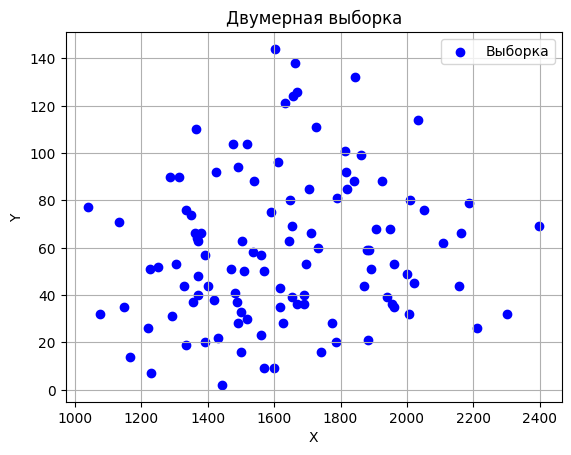

In [171]:
x = (1250, 1230, 1400, 1561, 1391, 1313, 1227, 1773, 1656, 1712, #выборка
                  2005, 1879, 1862, 2158, 1814, 1884, 1504, 1481, 1330, 2109,
                  2164, 1518, 1477, 1626, 1962, 1950, 1148, 1133, 1040, 1954,
                  1604, 1706, 1691, 1488, 1818, 1668, 1380, 1362, 1648, 1696,
                  1492, 2398, 1304, 1886, 1924, 1960, 2008, 1509, 1491, 1431,
                  1843, 1559, 1727, 1655, 1790, 1426, 1334, 1364, 1892, 1335,
                  1939, 1815, 1632, 1420, 1519, 2186, 1569, 1291, 1731, 1355,
                  1166, 1500, 1741, 2021, 1372, 1471, 1391, 1999, 2301, 1663,
                  2052, 1221, 1618, 1287, 2212, 1613, 1370, 2033, 1367, 1569,
                  1350, 1907, 1669, 1646, 1689, 1590, 1442, 1870, 1538, 1787,
                  1536, 1599, 1372, 1075, 1500, 1617, 1840, 1653)
y = (52, 7, 44, 57, 57, 90, 51, 28, 124, 66, 32, 59, 99, 44, 101,
                   21, 63, 41, 44, 62, 66, 30, 104, 28, 35, 68, 35, 71, 77, 36,
                   144, 85, 40, 37, 85, 36, 66, 66, 80, 53, 28, 69, 53, 59, 88,
                   53, 80, 50, 94, 22, 132, 23, 111, 69, 81, 92, 19, 110, 51,
                   76, 39, 92, 121, 38, 104, 79, 50, 31, 60, 37, 14, 33, 16,
                   45, 63, 51, 20, 49, 32, 138, 76, 26, 43, 90, 26, 96, 48,
                   114, 64, 9, 74, 68, 126, 63, 36, 75, 2, 44, 88, 20, 58,
                   9, 40, 32, 16, 35, 88, 39)

plt.scatter(x, y, color='blue', label='Выборка')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Двумерная выборка')
plt.legend()
plt.grid()
plt.show()

Нормализованая по следующим формулам: $\hat X = \frac{x-\bar x_в}{S_x}; \hat Y = \frac{y-\bar y_в}{S_y}$

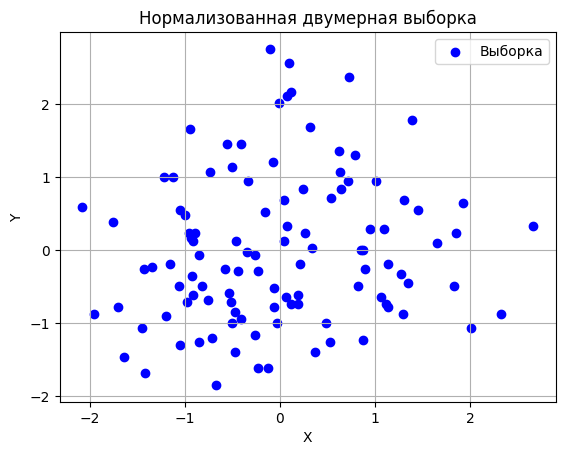

In [172]:
x = (1250, 1230, 1400, 1561, 1391, 1313, 1227, 1773, 1656, 1712, #выборка
                  2005, 1879, 1862, 2158, 1814, 1884, 1504, 1481, 1330, 2109,
                  2164, 1518, 1477, 1626, 1962, 1950, 1148, 1133, 1040, 1954,
                  1604, 1706, 1691, 1488, 1818, 1668, 1380, 1362, 1648, 1696,
                  1492, 2398, 1304, 1886, 1924, 1960, 2008, 1509, 1491, 1431,
                  1843, 1559, 1727, 1655, 1790, 1426, 1334, 1364, 1892, 1335,
                  1939, 1815, 1632, 1420, 1519, 2186, 1569, 1291, 1731, 1355,
                  1166, 1500, 1741, 2021, 1372, 1471, 1391, 1999, 2301, 1663,
                  2052, 1221, 1618, 1287, 2212, 1613, 1370, 2033, 1367, 1569,
                  1350, 1907, 1669, 1646, 1689, 1590, 1442, 1870, 1538, 1787,
                  1536, 1599, 1372, 1075, 1500, 1617, 1840, 1653)
y = (52, 7, 44, 57, 57, 90, 51, 28, 124, 66, 32, 59, 99, 44, 101,
                   21, 63, 41, 44, 62, 66, 30, 104, 28, 35, 68, 35, 71, 77, 36,
                   144, 85, 40, 37, 85, 36, 66, 66, 80, 53, 28, 69, 53, 59, 88,
                   53, 80, 50, 94, 22, 132, 23, 111, 69, 81, 92, 19, 110, 51,
                   76, 39, 92, 121, 38, 104, 79, 50, 31, 60, 37, 14, 33, 16,
                   45, 63, 51, 20, 49, 32, 138, 76, 26, 43, 90, 26, 96, 48,
                   114, 64, 9, 74, 68, 126, 63, 36, 75, 2, 44, 88, 20, 58,
                   9, 40, 32, 16, 35, 88, 39)

x_mean = 1635.172839506173 # данные из прошлых работ
y_mean = 59.12139917695473
s_x = 286.0932746391938
s_y = 30.86359609429004

x = [(x[i]-x_mean)/s_x for i in range(len(x))]
y = [(y[i]-y_mean)/s_y for i in range(len(y))]

plt.scatter(x, y, color='blue', label='Выборка')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Нормализованная двумерная выборка')
plt.legend()
plt.grid()
plt.show()

**Пункт 2**

**Определить «грубую» верхнюю оценку количества кластеров: $\tilde k = \lfloor\sqrt{N/2}\rfloor,$ где $N$ – число точек.**

In [173]:
k = round(math.sqrt(len(x) / 2))
print(k)

7


$\tilde k = 7$

**Пункт 3**

**Реализовать алгоритм $k$-means в двух вариантах.**



*   **пересчет центра кластера осуществляется после каждого изменения его состава;**
*   **пересчет центра кластера осуществляется лишь после того, как будет завершен просмотр всех данных (шаг процедуры).**

Для алгоритма $k$-means была написана функция "k_means", ее описание приведено в комментариях к коду

In [174]:
sample = [[x[i], y[i]] for i in range(len(x))]
k = 2

def __k_means_step(temp_sample, centers, clusters, mode):
  # вспомогательная функция
  for temp_x_i in temp_sample: # выбор x_i элемента
    # начальное минимальное евклидово расстояние
    min_dist = distance.euclidean(temp_x_i, centers[0])

    for center in centers: # цикл по всем центрам с нахождением минимального расстояния
      temp_min_dist = distance.euclidean(temp_x_i, center)
      if temp_min_dist < min_dist:
        min_dist = temp_min_dist

    for i in range(len(centers)): # цикл по этим же элементам, только теперь
    # элементы записываются в первый кластер с этим минимальным расстоянием
      if min_dist == distance.euclidean(temp_x_i, centers[i]):
        clusters[i].append(temp_x_i)
        if mode == 0:
          mean_x = [j[0] for j in clusters[i]] # среднее арифмитическое
          mean_y = [j[1] for j in clusters[i]]
          centers[i] = [sum(mean_x) / len(mean_x), sum(mean_y) / len(mean_y)]
        break
  if mode == 1:
    for i in range(len(centers)):
        mean_x = [j[0] for j in clusters[i]]
        mean_y = [j[1] for j in clusters[i]]
        centers[i] = [sum(mean_x) / len(mean_x), sum(mean_y) / len(mean_y)]
  return centers, clusters


def k_means(sample, k, mode=0):
  """
    применяет алгоритм k-means для двумерной выборки

    функция принимает:
      sample - двумерная в виде списка списков
      k - количество кластеров
      mode - режим работы:
        0 - пересчет центра кластера осуществляется после каждого изменения его состава
        1 - пересчет центра кластера осуществляется лишь после того, как будет
          завершен просмотр всех данных (шаг процедуры)

    функция возвращает:
      centers - центры кластеров в виде списка списков
      clusters - кластеры в виде списка списка списков

      F_i - функции качества согласно пункту 5
  """
  clusters = [[] for i in range(k)]
  temp_sample = sample.copy()
  # начальные центры кластеров
  index_centers = random.choices(population = range(len(temp_sample)), k=k)
  centers = [temp_sample[i] for i in index_centers]
  for i in range(len(centers)):
    clusters[i].append(centers[i])

  # удаление их из копии выборки
  index_centers.sort(reverse=True) # сортировка индексов по убыванию
  for i in index_centers:
    temp_sample.pop(i) # т.к. индексы отсортированы по убыванию, удаление
    # элементов из списка будет корректно

  __k_means_step(temp_sample, centers, clusters, mode)

  # сумма по всем кластерам квадратов расстояний элементов кластеров до центров соответствующих кластеров
  F_1 = [sum([distance.euclidean(clusters[i][j], centers[i]) ** 2 for i in
             range(len(clusters)) for j in range(len(clusters[i]))])]
  # сумма по всем кластерам внутрикластерных расстояний между элементами кластеров
  F_2 = []
  temp_F_2 = []
  for i in clusters:
    for x in i:
      for y in i:
        if x != y and [x, y] not in temp_F_2 and [y, x] not in temp_F_2:
          temp_F_2.append([x, y])

  F_2 = [sum([distance.euclidean(temp_F_2[i][0], temp_F_2[i][1]) ** 2 for i in range(len(temp_F_2))])]

  # сумма по всем кластерам внутрикластерных дисперсий (относительно центров кластеров)
  F_3 = [sum([((clusters[i][j][0] - centers[i][0]) ** 2 + (clusters[i][j][1] - centers[i][1]) ** 2) / len(clusters[i]) for i
             in range(len(clusters)) for j in range(len(clusters[i]))])]

  temp_clusters = [[] for i in range(k)] # пустые кластеры
  temp_sample = sample.copy() # копия исходной выборки

  while temp_clusters != clusters: # прогон алгоритма, пока кластеры на текущем шагу
  # не станут равны кластерам на предыдущем шагу
    __k_means_step(temp_sample, centers, temp_clusters, mode)

    F_1.append(sum([distance.euclidean(clusters[i][j], centers[i]) for i in
             range(len(clusters)) for j in range(len(clusters[i]))]))

    temp_F_2 = []
    for i in clusters:
      for x in i:
        for y in i:
          if x != y and [x, y] not in temp_F_2 and [y, x] not in temp_F_2:
            temp_F_2.append([x, y])

    F_2.append(sum([distance.euclidean(temp_F_2[i][0], temp_F_2[i][1]) ** 2 for i in range(len(temp_F_2))]))

    F_3.append(sum([((clusters[i][j][0] - centers[i][0]) ** 2 +
     (clusters[i][j][1] - centers[i][1]) ** 2) / len(clusters[i]) for i
             in range(len(clusters)) for j in range(len(clusters[i]))]))

    if temp_clusters == clusters:
      break
    clusters = temp_clusters
    temp_clusters = [[] for i in range(k)]

  return centers, clusters, F_1, F_2, F_3

Отображение кластеров ($k$ (количество кластеров) от 0 до 7):

In [175]:
def draw_clusters(k, clusters, centers, mode=0):
  """
    фунция отрисовки кластеров

    функция принимает:
      k - количество кластеров
      clusters - кластеры (см комментарии к прошлой функции)
      centers - центры кластеров (см комментарии к прошлой функции)
      moode - алгоритм k-means (см комментарии к прошлой функции)
  """

  colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

  for i in range(len(clusters)):
    temp_x = [clusters[i][j][0] for j in range(len(clusters[i]))]
    temp_y = [clusters[i][j][1] for j in range(len(clusters[i]))]
    plt.scatter(temp_x, temp_y, color=colors[i], label=str(i+1) + '-й кластер')
    plt.scatter(centers[i][0], centers[i][1], color=colors[i], marker='*', s=200)
  plt.xlabel('X')
  plt.ylabel('Y')

  if mode == 0:
    temp_str = "(первый способ)"
  else:
    temp_str = "(второй способ)"

  plt.title('Нормализованная двумерная выборка, разбитая на ' + str(k) + ' кластера ' + str(temp_str))
  plt.legend()
  plt.grid()
  plt.show()


def print_table(F_1, F_2, F_3):
  myTable = PrettyTable(["№ итерации", "F_1", "F_2", "F_3"])

  for i in range(len(F_1)):
    myTable.add_row([i+1, F_1[i], F_2[i], F_3[i]])

  print(myTable)

Элементы кластеров отображены точками (у каждого кластера свой цвет), центроиды этих кластеров - звездами

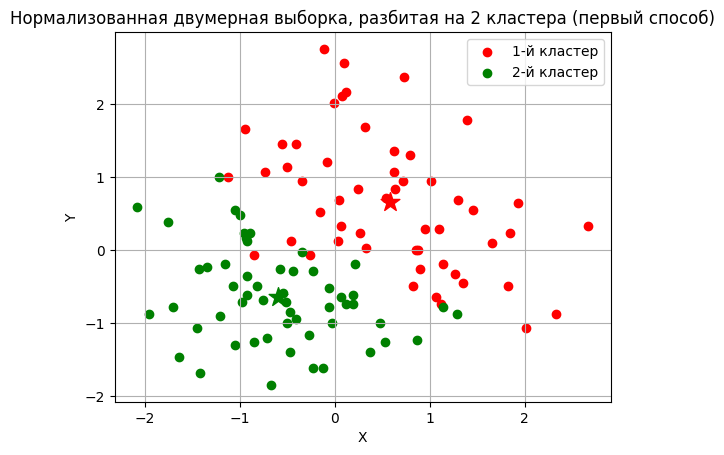

+------------+--------------------+-------------------+--------------------+
| № итерации |        F_1         |        F_2        |        F_3         |
+------------+--------------------+-------------------+--------------------+
|     1      | 134.92162539393422 | 7644.628852570581 | 2.405175934018851  |
|     2      | 108.31124009308989 | 7644.628852570581 | 2.4647487063181504 |
|     3      | 106.55786929664131 | 7208.989169812523 | 2.494400748442447  |
+------------+--------------------+-------------------+--------------------+


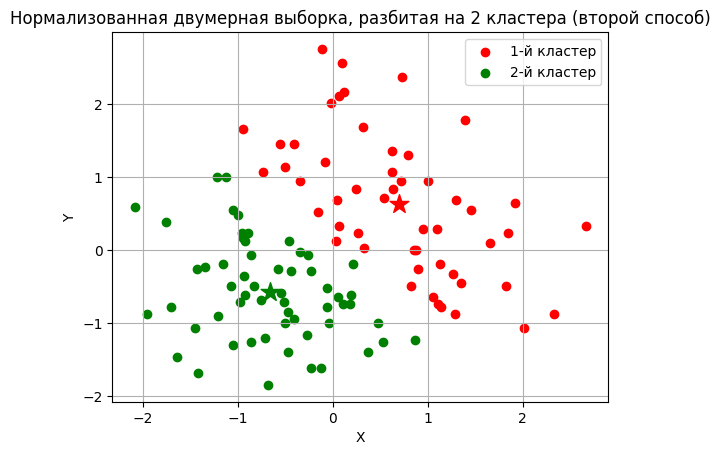

+------------+--------------------+-------------------+--------------------+
| № итерации |        F_1         |        F_2        |        F_3         |
+------------+--------------------+-------------------+--------------------+
|     1      | 159.58172973115637 |  9183.31158191977 | 2.992016064305134  |
|     2      | 117.76049731252498 |  9183.31158191977 | 3.0198436480734494 |
|     3      | 115.1854767958941  | 8479.537951180391 | 2.9197013352737216 |
|     4      | 112.72060061152622 | 8197.348312917082 | 2.828661087759454  |
|     5      | 111.64854568747722 | 8133.554082383999 | 2.772866616011376  |
|     6      | 110.94465395368003 | 8134.994733604617 | 2.7281702743862826 |
|     7      | 110.90978838543602 | 8116.577737956646 | 2.753492194068659  |
|     8      | 108.77518033767005 | 7333.295741221502 | 2.674735819189607  |
|     9      | 105.93480620125365 | 7044.654372275512 | 2.5242363680103375 |
|     10     | 104.87405985581957 | 6878.848361684989 | 2.461083785852709  |

In [178]:
k = 2

centers, clusters, F_1, F_2, F_3 = k_means(sample, k, 0)
draw_clusters(k, clusters, centers, mode=0)

print_table(F_1, F_2, F_3)

centers, clusters, F_1, F_2, F_3 = k_means(sample, k, 1)
draw_clusters(k, clusters, centers, mode=1)

print_table(F_1, F_2, F_3)

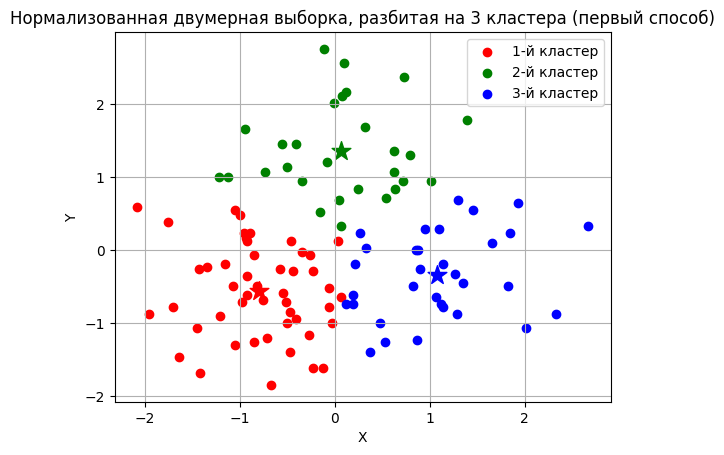

+------------+-------------------+--------------------+--------------------+
| № итерации |        F_1        |        F_2         |        F_3         |
+------------+-------------------+--------------------+--------------------+
|     1      |  80.7746453865527 | 3010.7027382879523 | 2.275829823697494  |
|     2      | 85.07819958677392 | 3010.7027382879523 | 2.3013431623595944 |
|     3      | 83.43682119518179 |  2931.44199175085  | 2.2033090286662986 |
+------------+-------------------+--------------------+--------------------+


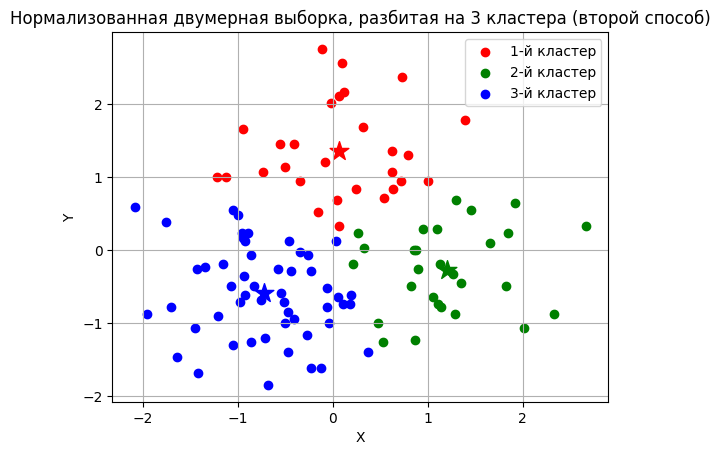

+------------+--------------------+--------------------+--------------------+
| № итерации |        F_1         |        F_2         |        F_3         |
+------------+--------------------+--------------------+--------------------+
|     1      | 127.32991000175166 | 6808.790845739473  | 3.6729116948796046 |
|     2      | 103.34571702373847 | 6808.790845739473  |  3.92170563455806  |
|     3      | 101.0638230732136  | 6205.185719074816  | 2.9566834359085545 |
|     4      | 97.35805445460836  | 5014.258525409727  | 2.9761808865158064 |
|     5      |  87.5135774607016  | 3569.0164936240285 | 2.401413129404157  |
|     6      | 84.90960420919325  | 3242.8218929871505 |  2.26199298213632  |
|     7      | 84.05735483267628  | 3105.1708565146773 | 2.229442278457102  |
|     8      | 83.23156921896508  | 3061.0411553884023 | 2.1650004811424393 |
+------------+--------------------+--------------------+--------------------+


In [179]:
k = 3

centers, clusters, F_1, F_2, F_3 = k_means(sample, k, 0)
draw_clusters(k, clusters, centers, mode=0)

print_table(F_1, F_2, F_3)

centers, clusters, F_1, F_2, F_3 = k_means(sample, k, 1)
draw_clusters(k, clusters, centers, mode=1)

print_table(F_1, F_2, F_3)

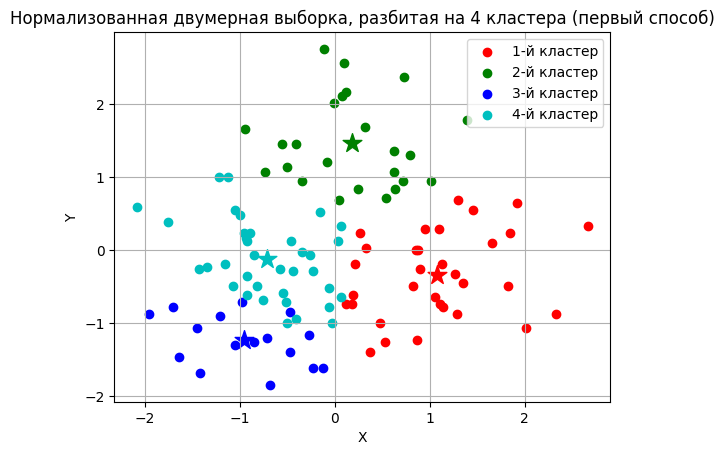

+------------+-------------------+--------------------+--------------------+
| № итерации |        F_1        |        F_2         |        F_3         |
+------------+-------------------+--------------------+--------------------+
|     1      | 66.07762620523057 | 1911.1822335203542 | 2.4060714276277606 |
|     2      | 84.50365535296058 | 1911.1822335203542 | 3.0396585622643313 |
|     3      | 76.62574669533635 | 1957.6304125956872 | 2.3793151444825122 |
+------------+-------------------+--------------------+--------------------+


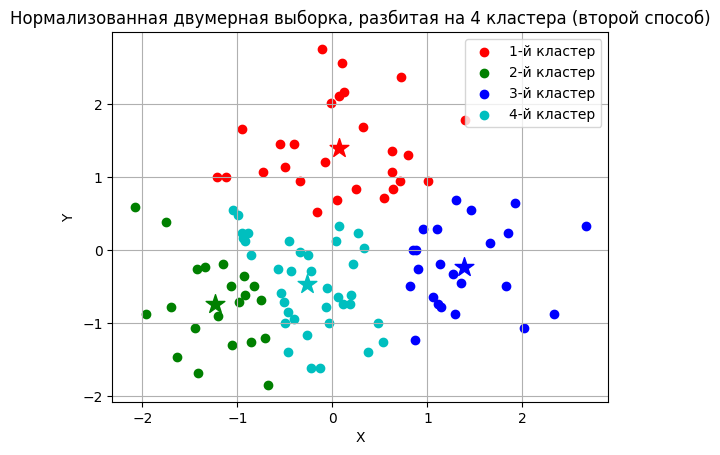

+------------+-------------------+--------------------+--------------------+
| № итерации |        F_1        |        F_2         |        F_3         |
+------------+-------------------+--------------------+--------------------+
|     1      | 77.76672434501504 | 2649.980848916745  | 2.6867050540969886 |
|     2      | 82.83283158131856 | 2649.980848916745  | 2.7700707743746205 |
|     3      | 80.64213181189203 |  2307.90079964155  | 2.694364930424465  |
|     4      | 79.56712014532133 | 2085.8659669371655 | 2.6993914579881637 |
|     5      | 78.82764510514419 | 1901.7902167552334 | 2.6309187334375967 |
|     6      | 76.95516403465757 | 1867.3290398833883 | 2.470786335007017  |
|     7      | 76.56620546796319 | 1869.3384176970417 | 2.4196709659323257 |
|     8      | 76.51557952091206 | 1854.1143072659625 | 2.412006018568299  |
+------------+-------------------+--------------------+--------------------+


In [180]:
k = 4

centers, clusters, F_1, F_2, F_3 = k_means(sample, k, 0)
draw_clusters(k, clusters, centers, mode=0)

print_table(F_1, F_2, F_3)

centers, clusters, F_1, F_2, F_3 = k_means(sample, k, 1)
draw_clusters(k, clusters, centers, mode=1)

print_table(F_1, F_2, F_3)

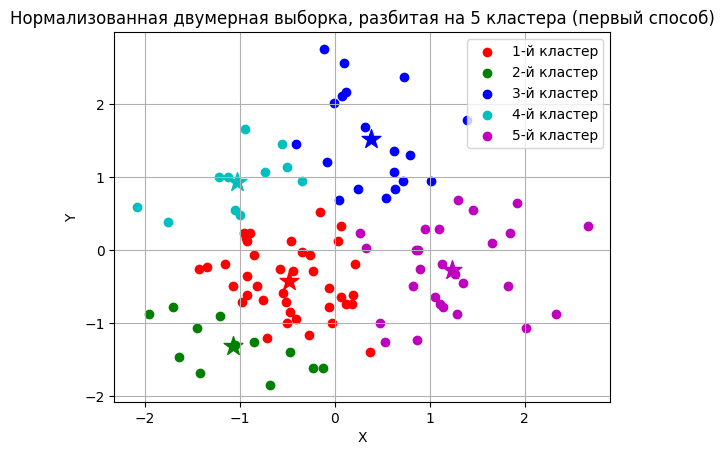

+------------+-------------------+--------------------+--------------------+
| № итерации |        F_1        |        F_2         |        F_3         |
+------------+-------------------+--------------------+--------------------+
|     1      | 56.76412125280525 | 1320.1905856426881 | 2.5841350900731506 |
|     2      | 96.95588352507798 | 1320.1905856426881 | 5.591256176482445  |
|     3      | 70.33512014512146 | 1456.0142767780783 | 2.523535869032354  |
+------------+-------------------+--------------------+--------------------+


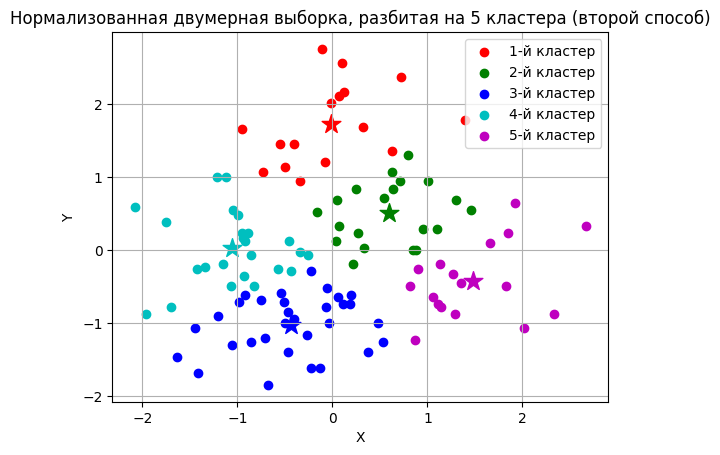

+------------+-------------------+--------------------+--------------------+
| № итерации |        F_1        |        F_2         |        F_3         |
+------------+-------------------+--------------------+--------------------+
|     1      |  56.5638342993135 | 1400.7063243312027 | 2.565762943731257  |
|     2      | 70.43366561970116 | 1400.7063243312027 | 2.5938546588797906 |
|     3      | 68.91665727054007 | 1299.8329760023942 | 2.5014006020307065 |
|     4      | 69.54819455486506 |  1283.07039835006  | 2.5372525510265644 |
|     5      | 69.02730747398815 | 1214.3059570464457 | 2.4868477418110455 |
|     6      |  67.8768703075064 | 1175.317156481505  | 2.448345097771345  |
|     7      |  67.3670520959832 | 1155.8053862905988 | 2.4086937532289956 |
+------------+-------------------+--------------------+--------------------+


In [181]:
k = 5

centers, clusters, F_1, F_2, F_3 = k_means(sample, k, 0)
draw_clusters(k, clusters, centers, mode=0)

print_table(F_1, F_2, F_3)

centers, clusters, F_1, F_2, F_3 = k_means(sample, k, 1)
draw_clusters(k, clusters, centers, mode=1)

print_table(F_1, F_2, F_3)


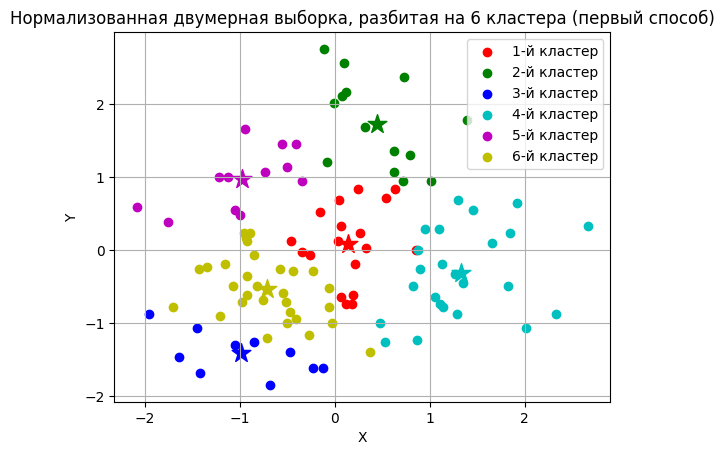

+------------+-------------------+--------------------+--------------------+
| № итерации |        F_1        |        F_2         |        F_3         |
+------------+-------------------+--------------------+--------------------+
|     1      | 48.07728252971364 | 1297.776725510749  | 2.3414785847744874 |
|     2      | 78.11902524728578 | 1297.776725510749  | 3.769070954232361  |
|     3      | 87.51434541165781 | 872.4093203240276  | 5.440384910660298  |
|     4      | 66.20539275047531 | 1039.2277392003105 | 2.7671351961451434 |
+------------+-------------------+--------------------+--------------------+


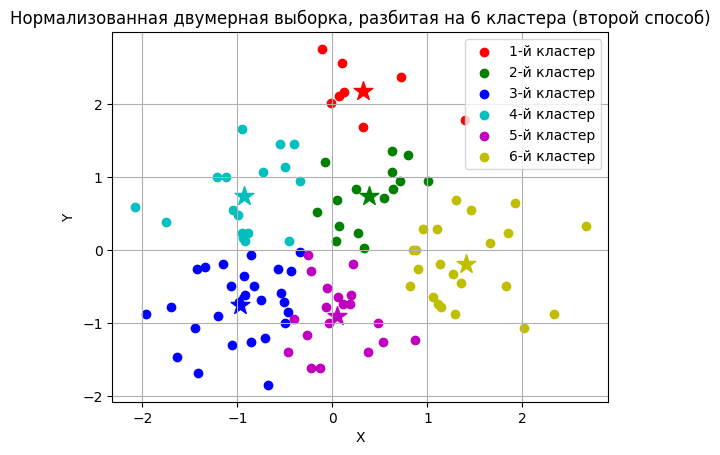

+------------+--------------------+--------------------+--------------------+
| № итерации |        F_1         |        F_2         |        F_3         |
+------------+--------------------+--------------------+--------------------+
|     1      | 102.95810712778746 | 3907.013857968718  | 4.062763359678291  |
|     2      | 94.07117206787271  | 3907.013857968718  | 4.893071747419689  |
|     3      | 74.64503492410348  |  1881.44702840229  | 3.5498036619983524 |
|     4      | 67.96465217764128  | 1625.551404154927  | 2.509739537502699  |
|     5      | 65.97248517294504  | 1296.2993056746186 | 2.4812103613495458 |
|     6      | 64.85773333421255  | 1154.1933345356676 | 2.3812010029670097 |
|     7      |  63.6114592901081  | 1000.0473582054279 | 2.365843644388843  |
|     8      | 63.44740243007196  |  969.615004256706  | 2.3830333721040495 |
|     9      | 63.29100650493465  | 969.5060482758215  | 2.369591553753368  |
|     10     | 63.168840247742935 | 943.2330225023445  | 2.38483

In [182]:
k = 6

centers, clusters, F_1, F_2, F_3 = k_means(sample, k, 0)
draw_clusters(k, clusters, centers, mode=0)

print_table(F_1, F_2, F_3)

centers, clusters, F_1, F_2, F_3 = k_means(sample, k, 1)
draw_clusters(k, clusters, centers, mode=1)

print_table(F_1, F_2, F_3)

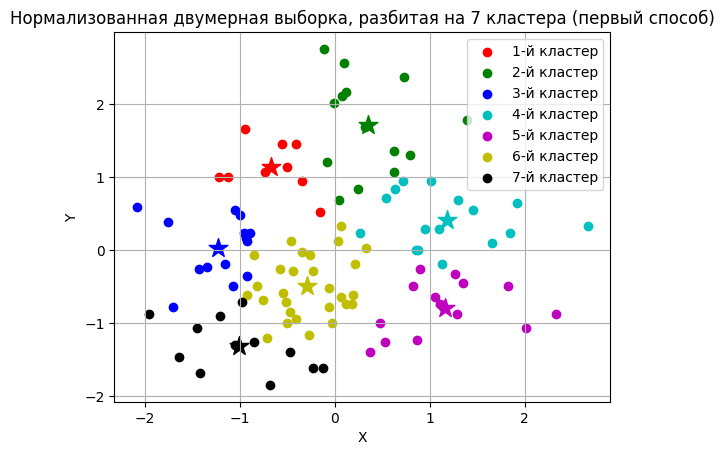

+------------+--------------------+-------------------+-------------------+
| № итерации |        F_1         |        F_2        |        F_3        |
+------------+--------------------+-------------------+-------------------+
|     1      | 45.385143699568886 | 985.2119831390273 | 2.515470434153184 |
|     2      | 95.43380795253516  | 985.2119831390273 | 5.647702205041843 |
|     3      |  76.5173369414241  | 956.3176414008826 |  4.46509444398965 |
|     4      | 59.62926333988322  | 686.2445235101789 | 2.658134899268469 |
+------------+--------------------+-------------------+-------------------+


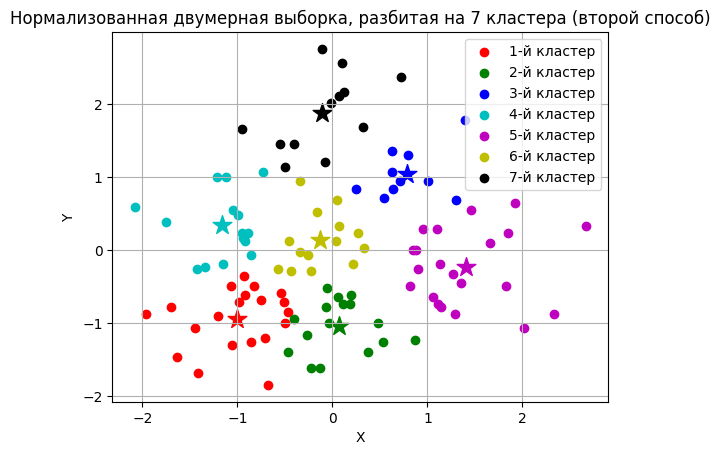

+------------+--------------------+-------------------+--------------------+
| № итерации |        F_1         |        F_2        |        F_3         |
+------------+--------------------+-------------------+--------------------+
|     1      | 42.62325569016448  | 904.9956761861672 | 2.2765847668492554 |
|     2      | 60.62618158316232  | 904.9956761861672 | 2.3474594446040595 |
|     3      | 59.01480613989982  | 766.3536302554687 | 2.3736465193878504 |
|     4      | 57.90359288345979  | 693.6410259427274 | 2.338693685364582  |
|     5      | 57.48331343100775  |  661.487898219699 | 2.3101487482895773 |
|     6      | 57.45878691132559  | 641.0709352838247 | 2.318875639020871  |
|     7      | 57.289882863228236 | 631.7292376370285 | 2.3068719422780952 |
|     8      | 56.62002653156281  | 611.2792601583678 | 2.2478088890058148 |
+------------+--------------------+-------------------+--------------------+


In [183]:
k = 7

centers, clusters, F_1, F_2, F_3 = k_means(sample, k, 0)
draw_clusters(k, clusters, centers, mode=0)

print_table(F_1, F_2, F_3)

centers, clusters, F_1, F_2, F_3 = k_means(sample, k, 1)
draw_clusters(k, clusters, centers, mode=1)

print_table(F_1, F_2, F_3)

**Пункт 4**

**На каждом шаге процедуры разбиения методом $k$-means вычислять функционалы качества полученного разбиения:**


*   $F_1$ – сумма по всем кластерам квадратов расстояний элементов кластеров до центров соответствующих кластеров;
*   $F_2$ – сумма по всем кластерам внутрикластерных расстояний между элементами кластеров;
*   $F_3$ – сумма по всем кластерам внутрикластерных дисперсий (относительно центров кластеров).

Вычисления для этого пункта были произведены в пункте 3. Здесь отображено объединение всех результатов:

| № итерации (k=2, первый алгоритм) | $$F_1$$ | $$F_2$$ | $$F_3$$ |  | № итерации (k=2, второй алгоритм) | $$F_1$$ | $$F_2$$ | $$F_3$$ |
|----------|----------|----------|----------| |----------|----------|----------|----------|
| 1  | 134.92162539393422   | 7644.628852570581   | 2.405175934018851    | |     1      | 159.58172973115637 |  9183.31158191977 | 2.992016064305134  |
| 2   | 108.31124009308989   | 7644.628852570581   | 2.4647487063181504    | |     2      | 117.76049731252498 |  9183.31158191977 | 3.0198436480734494 |
| 3  | 106.55786929664131   | 7208.989169812523   | 2.494400748442447    | |     3      | 115.1854767958941  | 8479.537951180391 | 2.9197013352737216 |
|  |    |    |     | |     4      | 112.72060061152622 | 8197.348312917082 | 2.828661087759454  |
|  |    |    |     | |     5      | 111.64854568747722 | 8133.554082383999 | 2.772866616011376  |
|  |    |    |     | |     6      | 110.94465395368003 | 8134.994733604617 | 2.7281702743862826 |
|  |    |    |     | |     7      | 110.90978838543602 | 8116.577737956646 | 2.753492194068659  |
|  |    |    |     | |     8      | 108.77518033767005 | 7333.295741221502 | 2.674735819189607  |
|  |    |    |     | |     9      | 105.93480620125365 | 7044.654372275512 | 2.5242363680103375 |
|  |    |    |     | |     10     | 104.87405985581957 | 6878.848361684989 | 2.461083785852709  |
|  |    |    |     | |     11     | 104.29629310764848 | 6808.002501799887 | 2.4187455101042388 |
|  |    |    |     | |     12     | 104.15243390265188 | 6798.924359749345 | 2.4009665510422664 |

| № итерации (k=3, первый алгоритм) | $$F_1$$ | $$F_2$$ | $$F_3$$ |  | № итерации (k=3, второй алгоритм) | $$F_1$$ | $$F_2$$ | $$F_3$$ |
|----------|----------|----------|----------| |----------|----------|----------|----------|
|     1      |  80.7746453865527 | 3010.7027382879523 | 2.275829823697494  | |     1      | 127.32991000175166 | 6808.790845739473  | 3.6729116948796046 |
|     2      | 85.07819958677392 | 3010.7027382879523 | 2.3013431623595944 ||     2      | 103.34571702373847 | 6808.790845739473  |  3.92170563455806  |
|     3      | 83.43682119518179 |  2931.44199175085  | 2.2033090286662986 ||     3      | 101.0638230732136  | 6205.185719074816  | 2.9566834359085545 |
|           | |   |  ||     4      | 97.35805445460836  | 5014.258525409727  | 2.9761808865158064 |
|          |   |  |  ||     5      |  87.5135774607016  | 3569.0164936240285 | 2.401413129404157  |
|         |  |  |   ||     6      | 84.90960420919325  | 3242.8218929871505 |  2.26199298213632  |
|         |  |  |  ||     7      | 84.05735483267628  | 3105.1708565146773 | 2.229442278457102  |
|         | |  |  ||     8      | 83.23156921896508  | 3061.0411553884023 | 2.1650004811424393 |

| № итерации (k=4, первый алгоритм) | $$F_1$$ | $$F_2$$ | $$F_3$$ |  | № итерации (k=4, второй алгоритм) | $$F_1$$ | $$F_2$$ | $$F_3$$ |
|----------|----------|----------|----------| |----------|----------|----------|----------|
|     1      | 66.07762620523057 | 1911.1822335203542 | 2.4060714276277606 ||     1      | 77.76672434501504 | 2649.980848916745  | 2.6867050540969886 |
|     2      | 84.50365535296058 | 1911.1822335203542 | 3.0396585622643313 ||     2      | 82.83283158131856 | 2649.980848916745  | 2.7700707743746205 |
|     3      | 76.62574669533635 | 1957.6304125956872 | 2.3793151444825122 ||     3      | 80.64213181189203 |  2307.90079964155  | 2.694364930424465  |
|          |  |  |  ||     4      | 79.56712014532133 | 2085.8659669371655 | 2.6993914579881637 |
|         |  | | ||     5      | 78.82764510514419 | 1901.7902167552334 | 2.6309187334375967 |
|         |  | |  ||     6      | 76.95516403465757 | 1867.3290398833883 | 2.470786335007017  |
|        |  |  | ||     7      | 76.56620546796319 | 1869.3384176970417 | 2.4196709659323257 |
|        |  | |   ||     8      | 76.51557952091206 | 1854.1143072659625 | 2.412006018568299  |

| № итерации (k=5, первый алгоритм) | $$F_1$$ | $$F_2$$ | $$F_3$$ |  | № итерации (k=5, второй алгоритм) | $$F_1$$ | $$F_2$$ | $$F_3$$ |
|----------|----------|----------|----------| |----------|----------|----------|----------|
|     1      | 56.76412125280525 | 1320.1905856426881 | 2.5841350900731506 ||     1      |  56.5638342993135 | 1400.7063243312027 | 2.565762943731257  |
|     2      | 96.95588352507798 | 1320.1905856426881 | 5.591256176482445  ||     2      | 70.43366561970116 | 1400.7063243312027 | 2.5938546588797906 |
|     3      | 70.33512014512146 | 1456.0142767780783 | 2.523535869032354  ||     3      | 68.91665727054007 | 1299.8329760023942 | 2.5014006020307065 |
|         |  |  |  ||     4      | 69.54819455486506 |  1283.07039835006  | 2.5372525510265644 |
|        |  | |  ||     5      | 69.02730747398815 | 1214.3059570464457 | 2.4868477418110455 |
|         |  |   |  ||     6      |  67.8768703075064 | 1175.317156481505  | 2.448345097771345  |
|         |   | | ||     7      |  67.3670520959832 | 1155.8053862905988 | 2.4086937532289956 |

| № итерации (k=6, первый алгоритм) | $$F_1$$ | $$F_2$$ | $$F_3$$ |  | № итерации (k=6, второй алгоритм) | $$F_1$$ | $$F_2$$ | $$F_3$$ |
|----------|----------|----------|----------| |----------|----------|----------|----------|
|     1      | 48.07728252971364 | 1297.776725510749  | 2.3414785847744874 ||     1      | 102.95810712778746 | 3907.013857968718  | 4.062763359678291  |
|     2      | 78.11902524728578 | 1297.776725510749  | 3.769070954232361  ||     2      | 94.07117206787271  | 3907.013857968718  | 4.893071747419689  |
|     3      | 87.51434541165781 | 872.4093203240276  | 5.440384910660298  ||     3      | 74.64503492410348  |  1881.44702840229  | 3.5498036619983524 |
|     4      | 66.20539275047531 | 1039.2277392003105 | 2.7671351961451434 ||     4      | 67.96465217764128  | 1625.551404154927  | 2.509739537502699  |
|         |  |  |  ||     5      | 65.97248517294504  | 1296.2993056746186 | 2.4812103613495458 |
||||||     6      | 64.85773333421255  | 1154.1933345356676 | 2.3812010029670097 |
||||||     7      |  63.6114592901081  | 1000.0473582054279 | 2.365843644388843  |
||||||     8      | 63.44740243007196  |  969.615004256706  | 2.3830333721040495 |
||||||     9      | 63.29100650493465  | 969.5060482758215  | 2.369591553753368  |
||||||     10     | 63.168840247742935 | 943.2330225023445  | 2.3848301541437973 |
||||||     11     | 63.095443110028725 | 943.1795392562727  | 2.3894547485123825 |
||||||     12     | 62.45099043056643  | 928.2577583529232  | 2.343750404275917  |
||||||     13     | 61.95937793387738  | 915.8780528992498  | 2.283840916495483  |
||||||     14     | 61.62014515395437  | 870.0097502551411  | 2.2938281933420845 |

| № итерации (k=7, первый алгоритм) | $$F_1$$ | $$F_2$$ | $$F_3$$ |  | № итерации (k=7, второй алгоритм) | $$F_1$$ | $$F_2$$ | $$F_3$$ |
|----------|----------|----------|----------| |----------|----------|----------|----------|
|     1      | 45.385143699568886 | 985.2119831390273 | 2.515470434153184 ||     1      | 42.62325569016448  | 904.9956761861672 | 2.2765847668492554 |
|     2      | 95.43380795253516  | 985.2119831390273 | 5.647702205041843 ||     2      | 60.62618158316232  | 904.9956761861672 | 2.3474594446040595 |
|     3      |  76.5173369414241  | 956.3176414008826 |  4.46509444398965 ||     3      | 59.01480613989982  | 766.3536302554687 | 2.3736465193878504 |
|     4      | 59.62926333988322  | 686.2445235101789 | 2.658134899268469 ||     4      | 57.90359288345979  | 693.6410259427274 | 2.338693685364582  |
||||||     5      | 57.48331343100775  |  661.487898219699 | 2.3101487482895773 |
||||||     6      | 57.45878691132559  | 641.0709352838247 | 2.318875639020871  |
||||||     7      | 57.289882863228236 | 631.7292376370285 | 2.3068719422780952 |
||||||     8      | 56.62002653156281  | 611.2792601583678 | 2.2478088890058148 |

**Пункт 5**

**Отобразить полученные кластеры, выделить каждый кластер разным цветом, отметить центроиды.**

Данный пункт был проиллюстрирован в пункте 3

**Пункт 6**

**Содержательно проинтерпретировать полученные результаты.**

*   В пункте 1 была произведена нормализация данных с целью исключения доминации одной переменной над другой (в силу большой разницы между численными значениями)
*   В пункте 2 грубая верхняя оценка показала, что не имеет смысла разбивать выборку более, чем на 7-ь кластеров
*   В пункте 3 была графически отображена выборка с делением на кластеры в зависимости от заданного количества кластеров и вариаций алгоритма $k$-means

В пункте 4 были посчитаны функционалы качества на каждой итерации для различного количества кластеров (от 2 до 7) и вариаций алгоритма $k$-means. Полученные данные позволяют сделать следующие выводы:
*   Если опираться на функционалы $F_1$ и $F_2$, то с возрастанием количества кластеров, возрастает и качество разбиения на кластеры для обеих вариаций алгоритма. При этом второй алгоритм (в котором пересчет центра кластера осуществляется лишь после того, как будет завершен просмотр всех данных) в большинстве случаев показал себя лучше первого, если рассматривать функционалы $F_1$ и $F_2$ на последних итерациях (на первых итерациях наборот - первый алгоритм показал себя лучше). Также можно заметить, что с возрастанием шага итерации в случае второго алгоритма также увеличивается качество разбиения, но не в случае первого алгоритма.
*   Если опираться на функционал $F_3$, наилучшее разбиение получается при трех кластерах для обоих алгоритмах (то есть возрастание количества кластеров не приводит к улучшению качества разбиения). С возрастанием шага итерации, опять же, качество итерации улучшается только у второго алгоритма. Если сравнивать лучшие показатели обоих алгоритмов по рассматриваемому функционалу, то второй алгоритм снова оказывается лучше первого.









## Выводы

Работа выполнена на языке программирования Python. В ходе решения
поставленных задач были усвоены такие понятия как задача кластерного анализа, ее результат, центр кластера, радиус кластера, спорные объекты в кластерах, размер кластера, различные метрики расстояния для кластера, алгоритм $k$-means. В начале работы была произведена нормализация данных с целью исключения доминации одной переменной над другой. После чего была найдена грубая верхняя оценка для количества кластеров, и произведена кластеризация двумерной выборки из прошлых работ с помощью двух реализованных вариаций алгоритма $k$-means для различного числа кластеров: от 2 до грубой верхней оценки (7). Полученные данные были изображены графически с соответствующими центроидами для каждого кластера. После чего для определения качетва разбиения были найдены функционалы качества, которые позволили установить, что на рассматриваемых данных лучше себя показывает вторая вариация алгоритма.


